Best MAPE: 0.8349486589431763 at epoch 11


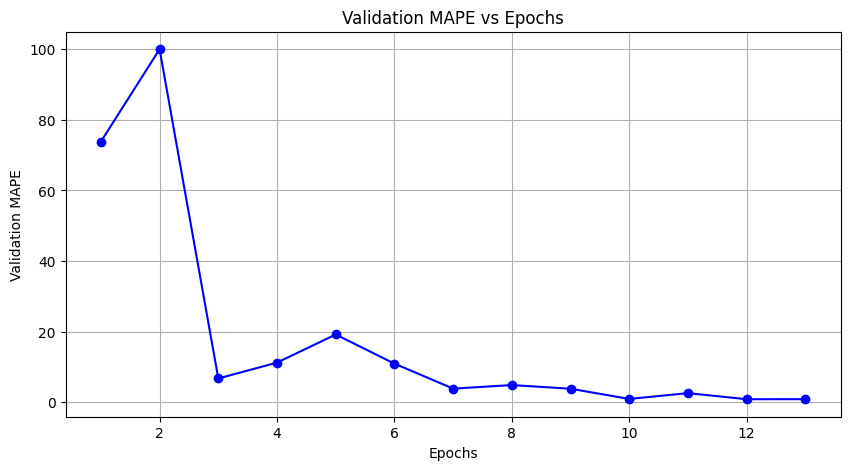

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the JSON file
with open('runs/wacv_2024_seed0/crop_yield/training_convlstm_debug/trainlog.json', 'r') as file:
    data = json.load(file)

# Extracting val_mape and epochs
epochs = list(map(int, data.keys()))
val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]
train_mape=[data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [(mape) for mape in val_mape]
# best_mape = min(val_mape)
# print(f'Best MAPE: {best_mape} at epoch {val_mape.index(best_mape)}')
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
plt.title('Validation MAPE vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.grid(True)
plt.show()

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np
import glob

runs = glob.glob('runs/wacv_2024_seed0/crop_yield/*')
print(runs)

# # Load the data from the JSON file
# with open('runs/wacv_2024_seed0/crop_yield/0_1_debug/trainlog.json', 'r') as file:
#     data = json.load(file)

# # Extracting val_mape and epochs
# epochs = list(map(int, data.keys()))
# val_mape = [data[str(epoch)]['val_mape'] for epoch in epochs]

# val_mape = [np.log(mape) for mape in val_mape]

# # Plotting the data
# plt.figure(figsize=(10, 5))
# plt.plot(epochs, val_mape, marker='o', linestyle='-', color='b')
# plt.title('Validation MAPE vs Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAPE')
# plt.grid(True)
# plt.show()

['runs/wacv_2024_seed0/crop_yield/0_1_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/fusion_pixel_attn_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug', 'runs/wacv_2024_seed0/crop_yield/after_concat_fusion_attn_pixelwise_0_debug_debug']


In [57]:
import numpy as np
# RdYlGn
pred_mask = np.load('val_results/seed0/val/crop_yield/0_2.npy')
gt_mask = np.load('val_results/seed0/val/crop_yield/0_2_gt.npy')
sickle_mask = np.load('val_results/seed_sickle/val/crop_yield/0_2.npy')
print(pred_mask)


[[ 554.66003   457.1588    366.2474   ...  199.69623   382.41083
   389.36584 ]
 [ 473.93896    94.259476 -249.78166  ...  -84.61885   311.19345
   371.83243 ]
 [ 190.89278   252.56079  -232.13655  ... -177.36115   341.13715
   224.46228 ]
 ...
 [ 180.82452   161.75294  -195.10254  ... -198.68192   109.64113
   177.80797 ]
 [ 483.4694    237.9806   -255.24794  ... -119.31595   207.4952
   440.85617 ]
 [ 669.3956    520.9917    135.62651  ...  120.315414  373.81534
   581.08545 ]]


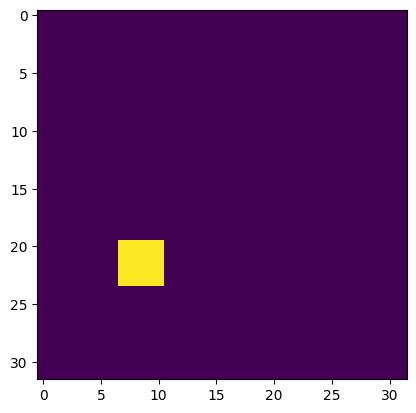

In [9]:
import matplotlib.pyplot as plt
#do 0 where less than 0
pred_mask[pred_mask < 0] = 0

plt.imshow(gt_mask[:, :])

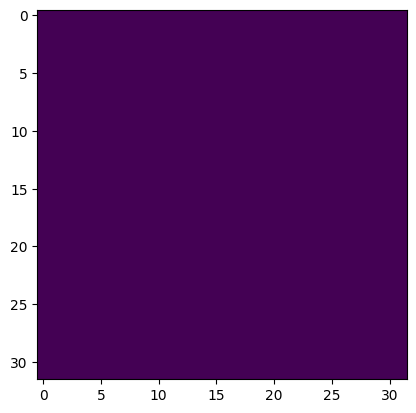

In [12]:
# pointwise negate pred mask using gt mask
pred_exact_mask = np.where(gt_mask == 0, pred_mask, 0)
plt.imshow(pred_exact_mask[:, :])

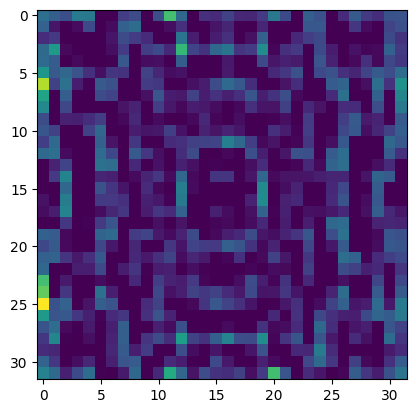

In [10]:
plt.imshow(pred_mask[:, :])

In [19]:
pred_mask.shape

(32, 32)

In [22]:
gt_mask

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32)

In [58]:
values = []
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1:
            pred_mask[i, j] = 0
            sickle_mask[i, j] = 0
        else:
            values.append(pred_mask[i, j])
for i in range(pred_mask.shape[0]):
    for j in range(pred_mask.shape[1]):
        if gt_mask[i, j] == -1:
            continue
        else:
            pred_mask[i, j] =np.mean(values)

In [59]:
np.mean(values)

68.57883

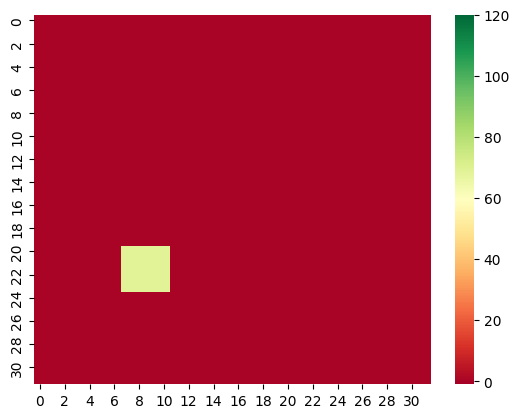

In [77]:
#with color bar for annotation
import seaborn as sns
a = sns.heatmap(pred_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_drop.pdf')



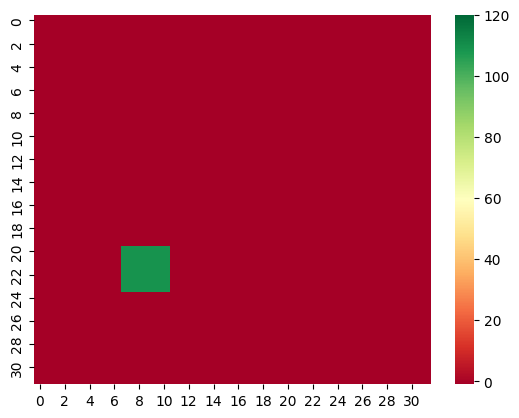

In [78]:
a = sns.heatmap(gt_mask,vmin=-1, vmax=120, cmap='RdYlGn')

fig = a.get_figure()
fig.savefig('heatmap_gt.pdf')

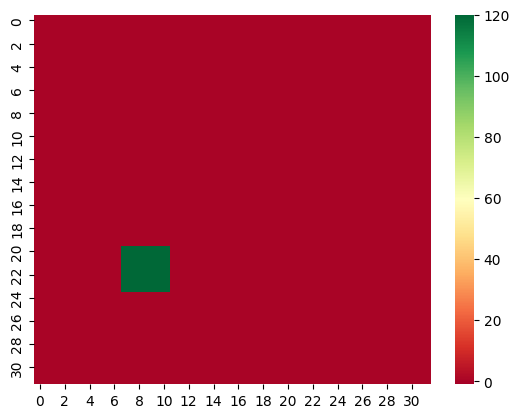

In [79]:
a = sns.heatmap(sickle_mask,vmin=-1, vmax=120, cmap='RdYlGn')
fig = a.get_figure()
fig.savefig('heatmap_sickle.pdf')